## Crime Rate
By Danny Cohen

In [18]:
import pandas as pd

Let's first take a look at the raw data

In [23]:
arrests = pd.read_csv("arrests.csv")
arrests.head(10)

,neighborhood,population,overall_crime_rate,number_arrests_murder,crime_rate_murder,number_arrests_rape,crime_rate_rape,number_arrests_robbery,crime_rate_robbery,number_arrests_assault,crime_rate_assault,number_arrests_burglary,crime_rate_burglary,number_arrests_larceny,crime_rate_larceny
0,31st Ward,7594,2.03,0,0.00,1,0.01,7,0.09,45,0.60,55,0.73,45,0.60
1,Allegheny Center,588,52.04,0,0.00,2,0.34,24,4.08,30,5.10,14,2.38,236,40.14
2,Allegheny West,1159,14.33,1,0.09,3,0.26,16,1.38,17,1.47,53,4.57,76,6.56
3,Allentown,5042,3.13,0,0.00,1,0.08,23,0.46,41,0.81,48,0.95,45,0.89
4,Arlington,4758,2.50,0,0.00,0,0.00,7,0.15,33,0.69,44,0.92,35,0.74
5,Arlington Heights,1989,6.19,0,0.00,2,0.10,14,0.70,61,3.07,21,1.06,25,1.26
6,Banksville,6235,1.94,0,0.00,2,0.03,8,0.13,8,0.13,53,0.85,50,0.80
7,Bedford Dwellings,3635,2.64,1,0.03,4,0.11,11,0.30,25,0.69,36,0.99,19,0.52
8,Beechview,12965,1.98,1,0.01,1,0.01,26,0.20,43,0.33,84,0.65,101,0.78
9,Beltzhoover,5980,6.37,1,0.02,3,0.05,63,1.05,58,0.97,121,2.02,135,2.26


Before we analyze the data, it is important to get an actual understanding of the data itself. Measures such as the **mean** and **median**, and creating a **histogram** of the population will give us a good idea of the population distribution throughout the neighborhoods.

Mean: 7077 Median: 6127


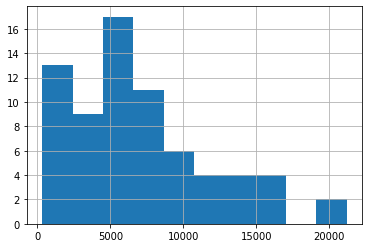

In [3]:
#Data frame of only population to make mean/median functions easier
population_df = arrests['population']
#Helps determine a population filter
print("Mean:", round(population_df.mean()), "Median:", round(population_df.median()))

population_df.hist()

We can also represent this as a **box plot**

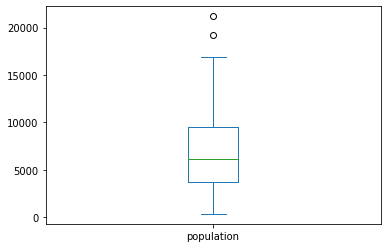

In [4]:
population_df.plot(kind = "box")

It is also important to see if there's a strong relationship between population and crime rate in order to decide if a population threshold is necessary. A **scatterplot** is a very good representation of the relationship between the two variables

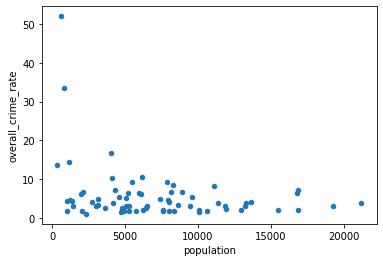

In [5]:
arrests[['population', 'overall_crime_rate']].sort_values(by=['overall_crime_rate'])
arrests.plot.scatter(x="population", y="overall_crime_rate")

Here, we see that aside from a few outliers, there is a very weak correlation between population and crime rate; as a result, a population threshold will not be used.

Now that we understand what our data will look like, we need to get rid of unnecessary columns. For the sake of this project, all major crimes will be weighed the same, so we only care about the overall crime rate, not the specific crime.

Let's take a look at the data set sorted by overall crime rate

In [6]:
#Get rid of unnecessary columns and sorts by overall crime rate
filtered_df = arrests[['neighborhood', 'overall_crime_rate']]
filtered_df.sort_values(by=['overall_crime_rate'])

,neighborhood,overall_crime_rate
27,Harpen Hilltop,0.99
17,Crafton Heights - Westwood - Oakwood,1.41
41,Morningside,1.61
12,Brighton Heights,1.64
22,Elliot,1.70
...,...,...
69,West End Valley,13.73
2,Allegheny West,14.33
20,East Liberty,16.63
62,The Strip,33.56


Now that our dataset is sorted by overall crime rate, we will assign a numerical value to each neighborhood. Rather than using a neighborhood's crime rate as a value, we will rank the neighborhoods 1 to 70 based on their respective crime rates. This way, we will have a controlled value to compare the metrics across all three datasets. 

In [7]:
#Add column that ranks the neighborhoods from lowest crime rate to highest; stores a value 1 to 70
filtered_df['rank'] = filtered_df['overall_crime_rate'].rank(ascending = True)

#Creates new data frame that sorts values by rank
ranked_df = filtered_df[['neighborhood', 'rank']]
final_df = ranked_df.sort_values(by=['rank'])

<ipython-input-7-eca8d2d31d42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rank'] = filtered_df['overall_crime_rate'].rank(ascending = True)


Let's take a look at the 10 safest neighborhoods in terms of overall crime rate

In [8]:
final_df.head(10)

,neighborhood,rank
27,Harpen Hilltop,1.0
17,Crafton Heights - Westwood - Oakwood,2.0
41,Morningside,3.0
12,Brighton Heights,4.0
22,Elliot,5.0
63,Swisshelm Park,6.0
66,Troy Hill,7.0
51,Shadeland Halls Grove,8.0
68,Upper Lawrenceville,9.0
56,Southside Slopes,10.5


In [9]:
final_df.tail(10)

,neighborhood,rank
40,Middle Hill,61.0
39,Manchester,62.0
16,Central North Side,63.0
65,The Bluff,64.0
38,Lower Oakland,65.0
69,West End Valley,66.0
2,Allegheny West,67.0
20,East Liberty,68.0
62,The Strip,69.0
1,Allegheny Center,70.0
